In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('SampleDonorData.xlsx')

## Evaluating and Cleaning

In [3]:
df.columns ##some columns from ref sheet not included

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

In [4]:
df.info() ##lots of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_B                       19372 non-null int64
TARGET_D                       19372 non-null int64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      14577 non-null float64
IN_HOUSE                       19372 non-null int64
URBANICITY                     19372 non-null object
CLUSTER_CODE                   18918 non-null float64
HOME_OWNER                     19372 non-null object
DONOR_GENDER                   19372 non-null object
INCOME_GROUP                   14980 non-null float64
PUBLISHED_PHONE                19372 non-null int64
WEALTH_RATING                  10562 non-null float64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
PEP_STAR                       19372 non-null in

In [5]:
df.drop(df[df.DONOR_AGE < 18].index, inplace=True) ##dropped all values less than 18 y/o, ~225 rows

In [6]:
df['DONOR_AGE'].fillna((df['DONOR_AGE'].mean()), inplace=True) ##replaced NaN with mean, no apparent outliers

In [7]:
df.dropna(subset=['CLUSTER_CODE'], inplace=True) ##dropped ~400 rows rather than impute, ~2pct of data

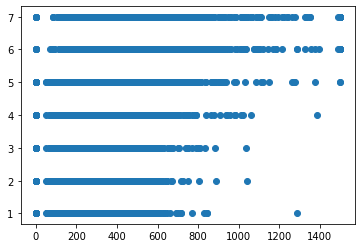

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['MEDIAN_HOUSEHOLD_INCOME'], df['INCOME_GROUP'])
plt.show()

In [11]:
df["INCOME_GROUP"] = df.groupby("MEDIAN_HOUSEHOLD_INCOME")["INCOME_GROUP"].transform(lambda x: x.fillna(x.mean())) 
##impute INCOME GROUP based on avg MED INCOME of area

In [12]:
df.INCOME_GROUP = df.INCOME_GROUP.round()

In [13]:
df.dropna(subset=['INCOME_GROUP'], inplace=True)

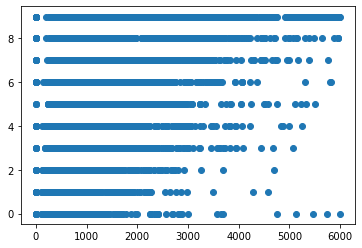

In [16]:
plt.scatter(df['MEDIAN_HOME_VALUE'], df['WEALTH_RATING'])
plt.show()

In [17]:
df["WEALTH_RATING"] = df.groupby("MEDIAN_HOME_VALUE")["WEALTH_RATING"].transform(lambda x: x.fillna(x.mean())) 
##impute Wealth Rating based on home value of area

In [23]:
df.WEALTH_RATING = df.WEALTH_RATING.round()

In [24]:
df.dropna(subset=['WEALTH_RATING'], inplace=True)

In [27]:
df.dropna(subset=['MONTHS_SINCE_LAST_PROM_RESP'], inplace=True)

In [36]:
df.reset_index(drop=True, inplace=True), df.info() ##cleaned, can type cast later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17638 entries, 0 to 17637
Data columns (total 25 columns):
TARGET_B                       17638 non-null int64
TARGET_D                       17638 non-null int64
CONTROL_NUMBER                 17638 non-null int64
MONTHS_SINCE_ORIGIN            17638 non-null int64
DONOR_AGE                      17638 non-null float64
IN_HOUSE                       17638 non-null int64
URBANICITY                     17638 non-null object
CLUSTER_CODE                   17638 non-null float64
HOME_OWNER                     17638 non-null object
DONOR_GENDER                   17638 non-null object
INCOME_GROUP                   17638 non-null float64
PUBLISHED_PHONE                17638 non-null int64
WEALTH_RATING                  17638 non-null float64
MEDIAN_HOME_VALUE              17638 non-null int64
MEDIAN_HOUSEHOLD_INCOME        17638 non-null int64
PCT_OWNER_OCCUPIED             17638 non-null int64
PEP_STAR                       17638 non-null in

(None, None)

## 1) Histogram of Cont. Variable (Card Response)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116c096d8>]],
      dtype=object)

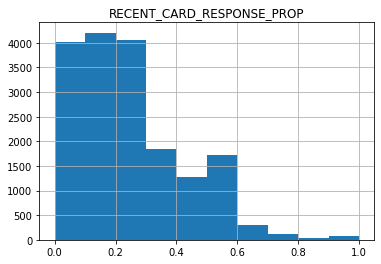

In [100]:
df.hist(column="RECENT_CARD_RESPONSE_PROP") #Create a Histogram for a continuous variable.
##asymmetric & +skew, not normally distributed.

### Mean, Median, Std, Intervals

In [103]:
df.RECENT_CARD_RESPONSE_PROP.mean(), df.RECENT_CARD_RESPONSE_PROP.median(), df.RECENT_CARD_RESPONSE_PROP.std()

(0.23072644290735914, 0.2, 0.1843329918196034)

In [104]:
N = 10000
mean_estimates = []
for _ in range(N):
    re_sample_idx = np.random.randint(0, len(df.RECENT_CARD_RESPONSE_PROP), df.RECENT_CARD_RESPONSE_PROP.shape)
    mean_estimates.append(np.mean(df.RECENT_CARD_RESPONSE_PROP[re_sample_idx]))

In [105]:
sorted_estimates = np.sort(np.array(mean_estimates))
conf_interval = [sorted_estimates[int(0.025 * N)], sorted_estimates[int(0.975 * N)]]

In [106]:
conf_interval

[0.22799461390180295, 0.2334522621612428]

In [107]:
N = 10000
median_estimates = []
for _ in range(N):
    re_sample_idx_med = np.random.randint(0, len(df.RECENT_CARD_RESPONSE_PROP), df.RECENT_CARD_RESPONSE_PROP.shape)
    median_estimates.append(np.median(df.RECENT_CARD_RESPONSE_PROP[re_sample_idx_med]))

In [108]:
sorted_med_estimates = np.sort(np.array(median_estimates))
conf_interval_med = [sorted_med_estimates[int(0.025 * N)], sorted_med_estimates[int(0.975 * N)]]

In [109]:
conf_interval_med

[0.2, 0.2]

In [110]:
N = 10000
std_estimates = []
for _ in range(N):
    re_sample_idx_std = np.random.randint(0, len(df.RECENT_CARD_RESPONSE_PROP), df.RECENT_CARD_RESPONSE_PROP.shape)
    std_estimates.append(np.std(df.RECENT_CARD_RESPONSE_PROP[re_sample_idx_std]))

In [111]:
sorted_std_estimates = np.sort(np.array(std_estimates))
conf_interval_std = [sorted_std_estimates[int(0.025 * N)], sorted_std_estimates[int(0.975 * N)]]

In [112]:
conf_interval_std

[0.18216858890375917, 0.18648396842674786]

In [85]:
### Mean and Median give us central tendency of the proportion of card responses, 
##the standard deviation gives us the dispersion of the proportion of card responses
##confidence intervals of the measures give us a 95% confidence that the population parameters are within these bounds

In [86]:
#Variable doesn't appear to follow normal distribution given asymmetry and positive skew

## 2) Correlation matrix and X-squared test

In [754]:
df2 = df[['PCT_OWNER_OCCUPIED','RECENT_CARD_RESPONSE_PROP','MONTHS_SINCE_LAST_PROM_RESP',\
          'LAST_GIFT_AMT','DONOR_AGE','TARGET_D','MEDIAN_HOUSEHOLD_INCOME',"MEDIAN_HOME_VALUE",\
          "MONTHS_SINCE_ORIGIN",'MONTHS_SINCE_LAST_GIFT','MONTHS_SINCE_FIRST_GIFT']]

In [755]:
df2.corr()
### most variables have extremely weak correlation, there is a slight negative relationship between last gift amount and 
## the number of responses in the last 4 years. Perhaps people who don't respond to mailers frequently make up for it with
## larger gifts.

,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,DONOR_AGE,TARGET_D,MEDIAN_HOUSEHOLD_INCOME,MEDIAN_HOME_VALUE,MONTHS_SINCE_ORIGIN,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
PCT_OWNER_OCCUPIED,1.000000,-0.013588,-0.000077,-0.007000,-0.023256,0.006513,0.442105,0.027070,0.040261,0.007682,0.040892
RECENT_CARD_RESPONSE_PROP,-0.013588,1.000000,-0.245138,-0.233755,-0.023678,-0.007865,-0.027470,-0.036689,-0.198264,-0.185141,-0.198908
MONTHS_SINCE_LAST_PROM_RESP,-0.000077,-0.245138,1.000000,0.127577,-0.023193,-0.007563,0.013714,0.002596,0.049113,0.680594,0.050106
LAST_GIFT_AMT,-0.007000,-0.233755,0.127577,1.000000,-0.048353,0.169405,0.080324,0.097538,-0.103812,0.096145,-0.105533
DONOR_AGE,-0.023256,-0.023678,-0.023193,-0.048353,1.000000,0.000050,-0.062142,0.006072,0.240848,-0.079479,0.240644
TARGET_D,0.006513,-0.007865,-0.007563,0.169405,0.000050,1.000000,0.064604,0.081198,0.007175,-0.032723,0.010429
MEDIAN_HOUSEHOLD_INCOME,0.442105,-0.027470,0.013714,0.080324,-0.062142,0.064604,1.000000,0.657475,0.003398,0.002550,0.004016
MEDIAN_HOME_VALUE,0.027070,-0.036689,0.002596,0.097538,0.006072,0.081198,0.657475,1.000000,0.014853,-0.016745,0.016136
MONTHS_SINCE_ORIGIN,0.040261,-0.198264,0.049113,-0.103812,0.240848,0.007175,0.003398,0.014853,1.000000,-0.020401,0.987926
MONTHS_SINCE_LAST_GIFT,0.007682,-0.185141,0.680594,0.096145,-0.079479,-0.032723,0.002550,-0.016745,-0.020401,1.000000,-0.024125


In [120]:
df3 = df[['TARGET_B','IN_HOUSE','URBANICITY','CLUSTER_CODE','HOME_OWNER','DONOR_GENDER',\
          'INCOME_GROUP','PUBLISHED_PHONE',\
          'WEALTH_RATING','PEP_STAR','RECENT_STAR_STATUS','recency_freq_status',]]

In [144]:
from itertools import combinations
cc = list(combinations(df3.columns,2))
cc2 = np.array(cc)

In [192]:
crosser= []
for i in cc2:
    c, p, dof, expected = chi2_contingency((pd.crosstab(df3[i[0]], df3[i[1]])))
    crosser.append((c,p,dof, expected)) ###creates contingency table for all combinations of categorical columns

In [193]:
df4 = pd.DataFrame(crosser)
df4.columns = ('c','p','dof','expected')
df4['labels']=cc

### X-squared results

In [206]:
from scipy.stats import chi2

In [207]:
df4['critical']=chi2.ppf(.95, df4['dof'])

In [209]:
def f(row):
    if row['c'] >= row['critical']:
        val = 'dependent'
    else:
        val = 'independent'
    return val

In [210]:
df4['dependence'] = df4.apply(f, axis=1)

In [219]:
pd.set_option('display.max_rows', 75)
 ## TARGET_B and IN_HOUSE are associated, which makes sense

'''DONOR_GENDER and WEALTH_RATING appear independent, given test statistic and dof'''

'''HOME_OWNER and WEALTH RATING appear to be dependent, which intuitively makes sense, and according to test and dof'''
df4


,c,p,dof,expected,labels,critical,dependence
0,31.509157,1.985020e-08,1,"[[12349.726726386212, 890.2732736137884], [410...","(TARGET_B, IN_HOUSE)",3.841459,dependent
1,12.798802,1.230190e-02,4,"[[2852.4776051706544, 2923.7895452999205, 3035...","(TARGET_B, URBANICITY)",9.487729,dependent
2,101.225580,5.205896e-05,52,"[[153.1330082775825, 225.94625240957023, 175.6...","(TARGET_B, CLUSTER_CODE)",69.832160,dependent
3,2.273499,1.316025e-01,1,"[[7298.589409230071, 5941.410590769929], [2424...","(TARGET_B, HOME_OWNER)",3.841459,independent
4,0.883598,6.428788e-01,2,"[[7119.934232906226, 5437.7230978569, 682.3426...","(TARGET_B, DONOR_GENDER)",5.991465,independent
5,25.853658,2.370595e-04,6,"[[1281.3629663227123, 1932.178251502438, 2345....","(TARGET_B, INCOME_GROUP)",12.591587,dependent
6,0.007353,9.316639e-01,1,"[[6577.963487923801, 6662.036512076199], [2185...","(TARGET_B, PUBLISHED_PHONE)",3.841459,independent
7,44.757834,1.022856e-06,9,"[[508.1914049211929, 702.6102732736138, 1194.2...","(TARGET_B, WEALTH_RATING)",16.918978,dependent
8,206.473926,8.075799e-47,1,"[[6439.843519673433, 6800.156480326567], [2139...","(TARGET_B, PEP_STAR)",3.841459,dependent
9,181.268654,2.561102e-41,1,"[[10212.620478512303, 3027.379521487697], [339...","(TARGET_B, RECENT_STAR_STATUS)",3.841459,dependent


## 3) Linear Regression

In [212]:
### Many dependent categorical variables, should exclude from model.

In [817]:
model_df = df[['LAST_GIFT_AMT',\
               'MEDIAN_HOUSEHOLD_INCOME',\
              'MONTHS_SINCE_LAST_GIFT','MEDIAN_HOME_VALUE','TARGET_D','PEP_STAR','URBANICITY',]]




In [818]:
model_df.info()
##binarize gender, coerce floats to ints, then standardize/normalize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17638 entries, 0 to 17637
Data columns (total 7 columns):
LAST_GIFT_AMT              17638 non-null int64
MEDIAN_HOUSEHOLD_INCOME    17638 non-null int64
MONTHS_SINCE_LAST_GIFT     17638 non-null int64
MEDIAN_HOME_VALUE          17638 non-null int64
TARGET_D                   17638 non-null int64
PEP_STAR                   17638 non-null int64
URBANICITY                 17638 non-null object
dtypes: int64(6), object(1)
memory usage: 964.7+ KB


In [789]:
#model_df['HOME_OWNER'] = model_df['HOME_OWNER'].apply({'H':1, 'U':0}.get)

In [790]:
##model_df.dropna(subset=['DONOR_GENDER'], inplace=True) ##dropped ~900 rows where gender unknown

In [819]:
model_df.URBANICITY.value_counts()

S    4044
R    3895
C    3800
T    3773
U    2126
Name: URBANICITY, dtype: int64

In [688]:
##model_df.WEALTH_RATING = model_df.WEALTH_RATING.astype(int)

In [689]:
##model_df.reset_index(drop=True, inplace=True)

In [820]:
model_df = pd.get_dummies(model_df, columns=['URBANICITY'], drop_first=True)

In [821]:
labels = model_df['TARGET_D']
model_df = model_df.drop('TARGET_D', 1)

In [822]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_df, labels, test_size=0.2, random_state=23)

In [823]:
from sklearn import preprocessing
names = X_train.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df, columns=names)

In [824]:
names = X_test.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_df, columns=names)

In [825]:
from sklearn.linear_model import LinearRegression

In [826]:
regress = LinearRegression()  
regress.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [827]:
y_pred = regress.predict(X_test)

In [828]:
len(X_test), len(y_test), len(X_train), len(y_train), len(y_pred)

(3528, 3528, 14110, 14110, 3528)

In [829]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.651818582171258
Mean Squared Error: 62.69302381140112
Root Mean Squared Error: 7.917892637021616


## 4) Other regressors

In [830]:
model_df = df[['LAST_GIFT_AMT',\
               'MEDIAN_HOUSEHOLD_INCOME',\
              'MONTHS_SINCE_LAST_GIFT','MEDIAN_HOME_VALUE','TARGET_D','PEP_STAR','URBANICITY']]

In [831]:
model_df = pd.get_dummies(model_df, columns=['URBANICITY'], drop_first=True)

In [832]:
y = model_df['TARGET_D']
X = model_df.drop('TARGET_D', 1)
names = X.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

In [833]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### Random forest regressor

In [840]:
def rfr_model(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(5,9),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_squared_error')
    return scores

In [839]:
rfr_model(X,y) ##worse average than MSE in linear

array([-76.71439235, -86.77058585, -84.21707368, -73.41114662,
       -68.1697427 , -72.99436522, -76.85858432, -88.51412925,
       -44.38863481, -93.42976927])

In [841]:
np.mean([-76.71439235, -86.77058585, -84.21707368, -73.41114662,
       -68.1697427 , -72.99436522, -76.85858432, -88.51412925,
       -44.38863481, -93.42976927])

-76.54684240699999

### Decision Tree regressor

In [842]:
from sklearn.tree import DecisionTreeRegressor

In [843]:
regressor = DecisionTreeRegressor()
cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')

array([-156.82312925, -205.57993197, -164.9914966 , -152.51303855,
       -131.3792517 , -174.7154195 , -209.93282313, -170.05725624,
       -115.0948667 , -215.43803176])

### Support Vector Regressor

In [811]:
from sklearn.svm import SVR

In [844]:
model = SVR()
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [845]:
pred_svr = model.predict(X_test)

In [846]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_svr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_svr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

Mean Absolute Error: 3.6693302931691796
Mean Squared Error: 75.46487856008828
Root Mean Squared Error: 8.687052351637366


## 5) Classifiers

In [853]:
model_df2 = df[['LAST_GIFT_AMT',\
               'MEDIAN_HOUSEHOLD_INCOME',\
              'MONTHS_SINCE_LAST_GIFT','MEDIAN_HOME_VALUE','TARGET_B','PEP_STAR','URBANICITY']]

In [854]:
model_df2 = pd.get_dummies(model_df2, columns=['URBANICITY'], drop_first=True)

In [855]:
labels2 = model_df2['TARGET_B']
model_df2 = model_df2.drop('TARGET_B', 1)

In [856]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(model_df2, labels2, test_size=0.2, random_state=23)

In [857]:
names2 = X_train2.columns
scaler2 = preprocessing.StandardScaler()
scaled_df2 = scaler2.fit_transform(X_train2)
X_train2 = pd.DataFrame(scaled_df2, columns=names2)

In [858]:
names2 = X_test2.columns
scaler2 = preprocessing.StandardScaler()
scaled_df2 = scaler2.fit_transform(X_test2)
X_test2 = pd.DataFrame(scaled_df2, columns=names2)

### KNN

In [862]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [863]:
npreds = neigh.predict(X_test2)

In [866]:
neigh.score(X_test2, y_test2)

0.6927437641723356

In [867]:
from sklearn.metrics import confusion_matrix

In [870]:
confusion_matrix(y_test2, npreds)

array([[2265,  395],
       [ 689,  179]])

In [871]:
from sklearn.metrics import f1_score

In [872]:
f1_score(y_test2, npreds)

0.2482662968099861

In [873]:
tn, fp, fn, tp = confusion_matrix(y_test2, npreds).ravel()

In [874]:
tn, fp, fn, tp  #predicting lots of 0, given class imbalance.

(2265, 395, 689, 179)

### Decision Tree Classifier

In [875]:
from sklearn.tree import DecisionTreeClassifier

In [876]:
DTclf = DecisionTreeClassifier()

In [877]:
DTclf.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [878]:
DTpreds = DTclf.predict(X_test2)

In [879]:
DTclf.score(X_test2, y_test2)

0.6139455782312925

In [880]:
f1_score(y_test2, DTpreds)

0.28914405010438415

In [881]:
tn, fp, fn, tp = confusion_matrix(y_test2, DTpreds).ravel()

In [882]:
tn, fp, fn, tp

(1889, 771, 591, 277)

### Random Forest

In [886]:
from sklearn.ensemble import RandomForestClassifier

In [892]:
RFclf = RandomForestClassifier(n_estimators =3)

In [893]:
RFclf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [894]:
RFpreds = RFclf.predict(X_test2)

In [895]:
f1_score(y_test2, RFpreds)

0.2641025641025641

### SVM

In [896]:
from sklearn.svm import SVC

In [905]:
SCMclf = SVC(gamma='auto')

In [906]:
SCMclf.fit(X_train2, y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [907]:
SVpreds = SCMclf.predict(X_test2)

In [908]:
f1_score(y_test2, SVpreds)

0.0022988505747126436

### SGD

In [918]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [919]:
gnbpreds= gnb.fit(X_train2, y_train2).predict(X_test2)

In [920]:
f1_score(y_test2, gnbpreds)

0.1480804387568556